In [2]:
features_csv_path = 'raw_features.csv'
target_variable = 'grade'
drop_columns = ['id', 'grade', 'benchmark', 'start1', 'start2', 'end']

In [3]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import metadata as md
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv(features_csv_path)

In [6]:
df['grade'] = np.vectorize(lambda x : md.grade_int[x])(df['grade'])

In [7]:
'''
df_train = df.loc[md.train_tf]
df_test = df.loc[md.text_df]

X_train = df_train.drop(columns = drop_columns).to_numpy()
y_train = df_train[target_variable].copy().values
X_test = df_test.drop(columns = drop_columns).to_numpy()
y_test = df_test[target_variable].copy().values
'''

'\ndf_train = df.loc[md.train_tf]\ndf_test = df.loc[md.text_df]\n\nX_train = df_train.drop(columns = drop_columns).to_numpy()\ny_train = df_train[target_variable].copy().values\nX_test = df_test.drop(columns = drop_columns).to_numpy()\ny_test = df_test[target_variable].copy().values\n'

In [8]:
#'''
X = df.drop(columns = drop_columns).to_numpy()
y = df[target_variable].copy().values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2016, stratify = y)
#'''

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [11]:
def acc_exact(actual, predicted):
    check = np.absolute(predicted - actual) <= 0.5
    return check.sum()/len(check)
def acc_within_one(actual, predicted):
    check = np.absolute(predicted - actual) <= 1.5
    return check.sum()/len(check)

In [12]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Accuracy rate (exact grade match):', acc_exact(y_test, y_pred))
print('Accuracy rate (within one grade):', acc_within_one(y_test, y_pred))

Mean squared error: 1.9544203195476333
Accuracy rate (exact grade match): 0.3040945691279767
Accuracy rate (within one grade): 0.7488435840328936


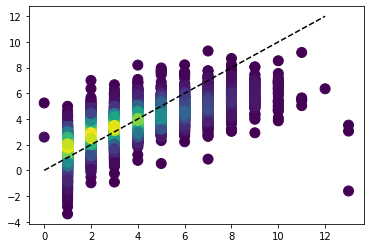

In [13]:
xy = np.vstack([y_test, y_pred])
z = sps.gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c=z, s=100)
plt.plot([0, 12], [0, 12], 'k--')
plt.show()

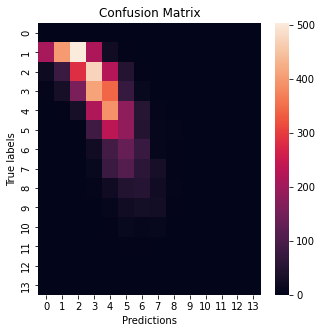

In [19]:
from sklearn.metrics import confusion_matrix

def round_int(item):
    if item < 13.5 and item > -0.5:
        return round(item)
    elif item > 13.5:
        return 13
    else:
        return 0

plt.figure(figsize=(5, 5))

cm = confusion_matrix(y_test, [round_int(x) for x in y_pred])
ax = plt.subplot()
sns.heatmap(cm, annot=False) #annot=True to annotate cells

ax.set_xlabel('Predictions')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [24]:
 confusion_matrix(y_test, [round_int(x) for x in y_pred])


array([[  0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0],
       [140, 468, 503, 216,  22,   2,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 14,  80, 281, 472, 224,  49,   3,   1,   0,   0,   0,   0,   0,
          0],
       [  3,  31, 157, 410, 340,  72,  11,   1,   0,   0,   0,   0,   0,
          0],
       [  0,   2,  30, 217, 390, 180,  52,   5,   1,   0,   0,   0,   0,
          0],
       [  0,   1,   1,  83, 234, 183,  49,   6,   5,   0,   0,   0,   0,
          0],
       [  0,   0,   1,  22,  90, 133,  76,   7,   3,   0,   0,   0,   0,
          0],
       [  0,   1,   0,  11,  78, 110,  57,  30,   2,   1,   0,   0,   0,
          0],
       [  0,   0,   0,   4,  21,  47,  50,  23,   5,   1,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   6,  23,  27,  25,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   2,  10,   7,   9,   1,   1,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   2,   2, 